<a href="https://colab.research.google.com/github/Maryann-dev/Data-Science-Work/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.8 MB/s eta 0:00:00


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Telco_customer_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
# Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         7043 non-null   object
 1   Country            7043 non-null   object
 2   State              7043 non-null   object
 3   City               7043 non-null   object
 4   Lat Long           7043 non-null   object
 5   Gender             7043 non-null   object
 6   Senior Citizen     7043 non-null   object
 7   Partner            7043 non-null   object
 8   Dependents         7043 non-null   object
 9   Phone Service      7043 non-null   object
 10  Multiple Lines     7043 non-null   object
 11  Internet Service   7043 non-null   object
 12  Online Security    7043 non-null   object
 13  Online Backup      7043 non-null   object
 14  Device Protection  7043 non-null   object
 15  Tech Support       7043 non-null   object
 16  Streaming TV       7043 non-null   object


In [ ]:
df['Total Charges'] = df['Total Charges'].replace(' ', np.nan )

In [ ]:
df['Total Charges'] = df['Total Charges'].astype(float)
df['Total Charges'].dtype

dtype('float64')

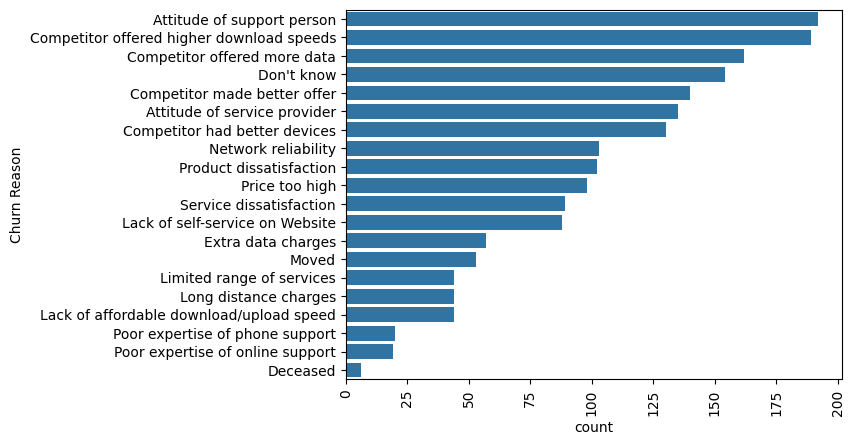

In [ ]:
# Get the count of each 'Churn Reason' and sort in descending order
reason_counts = df['Churn Reason'].value_counts()

# Get the index (the reason values) in the sorted order
reason_order = reason_counts.index

# Create the countplot with the specified order
sns.countplot(y=df['Churn Reason'], order=reason_order)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [ ]:
target = "Churn Reason"
feature = ["Tenure Months", "Phone Service", "Multiple Lines",
           "Internet Service", "Online Security", "Online Backup",
           "Device Protection", "Tech Support", "Streaming TV",
           "Streaming Movies", "Contract", "Paperless Billing",
           "Payment Method", "Monthly Charges", "Total Charges"]
X_train=df[feature]
y_train=df[target]

In [61]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df[feature], df[target], test_size=0.2, random_state=42
)


In [70]:
target_ohe = OneHotEncoder(use_cat_names=True) # Create a dedicated encoder for the target
target_ohe.fit(y_train) # Fit the target encoder
yt_train = target_ohe.transform(y_train) # Transform the target variable
print(yt_train.shape)
yt_train.head()

(5634, 21)


,Churn Reason_Competitor made better offer,Churn Reason_Limited range of services,Churn Reason_Product dissatisfaction,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Lack of self-service on Website,Churn Reason_Competitor had better devices,Churn Reason_Service dissatisfaction,Churn Reason_Don't know,Churn Reason_Extra data charges,...,Churn Reason_Competitor offered higher download speeds,Churn Reason_Price too high,Churn Reason_Attitude of support person,Churn Reason_Attitude of service provider,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Deceased,Churn Reason_nan
2142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1623,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1362,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
# Cell 62 (Modified)
# Instantiate transformer for target (using target_ohe)
# ohe = OneHotEncoder(use_cat_names=True)  # Remove or comment out this line
# Fit transformer to data
target_ohe.fit(y_train)  # This line might already be before Cell 62
# Transform data
yt_train = target_ohe.transform(y_train)
print(yt_train.shape)
yt_train.head()

(5634, 21)


,Churn Reason_Competitor made better offer,Churn Reason_Limited range of services,Churn Reason_Product dissatisfaction,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Lack of self-service on Website,Churn Reason_Competitor had better devices,Churn Reason_Service dissatisfaction,Churn Reason_Don't know,Churn Reason_Extra data charges,...,Churn Reason_Competitor offered higher download speeds,Churn Reason_Price too high,Churn Reason_Attitude of support person,Churn Reason_Attitude of service provider,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Deceased,Churn Reason_nan
2142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1623,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1362,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
y_mean = yt_train.mean()
y_mean
y_pred_baseline = [y_mean] * len(yt_train)
mae_baseline = mean_absolute_error(yt_train, y_pred_baseline)
print("Mean apt price:", round(y_mean, 2))

print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price: Churn Reason_Competitor made better offer                 0.02
Churn Reason_Limited range of services                    0.01
Churn Reason_Product dissatisfaction                      0.02
Churn Reason_Long distance charges                        0.01
Churn Reason_Moved                                        0.01
Churn Reason_Lack of self-service on Website              0.01
Churn Reason_Competitor had better devices                0.02
Churn Reason_Service dissatisfaction                      0.01
Churn Reason_Don't know                                   0.02
Churn Reason_Extra data charges                           0.01
Churn Reason_Competitor offered more data                 0.02
Churn Reason_Competitor offered higher download speeds    0.03
Churn Reason_Price too high                               0.01
Churn Reason_Attitude of support person                   0.03
Churn Reason_Attitude of service provider                 0.02
Churn Reason_Network reliability       

In [73]:
# Instantiate transformer
ohe = OneHotEncoder(use_cat_names=True)
# Fit transformer to data
ohe.fit(X_train)
# Transform data
XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train.head()

(5634, 38)


,Tenure Months,Phone Service_Yes,Phone Service_No,Multiple Lines_Yes,Multiple Lines_No,Multiple Lines_No phone service,Internet Service_Fiber optic,Internet Service_DSL,Internet Service_No,Online Security_No,...,Contract_Month-to-month,Contract_Two year,Paperless Billing_Yes,Paperless Billing_No,Payment Method_Credit card (automatic),Payment Method_Mailed check,Payment Method_Electronic check,Payment Method_Bank transfer (automatic),Monthly Charges,Total Charges
2142,71,1,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,98.65,6962.85
1623,16,1,0,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,93.20,1573.70
6074,32,1,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,104.05,3416.85
1362,24,0,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,40.65,933.30
6754,20,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,20.05,406.05


In [65]:
# Build Model
model = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    Ridge()
)
# Fit model
model.fit(XT_train, yt_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ridge', Ridge())])

In [77]:
# Transform X_test using the same OneHotEncoder used for X_train
XT_test = ohe.transform(X_test)  # Use the fitted 'ohe' object

# Now predict using the transformed X_test
# Get the predicted probabilities for each class
y_test_pred_probs = model.predict(XT_test)

# Get the original column name for the target variable
original_target_column = y_train.name

# Get the feature names after one-hot encoding
churn_reason_columns = target_ohe.get_feature_names_out([original_target_column])

# Get the index of the column with the highest probability for each sample
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)

# Convert the predicted class indices to the original class labels
y_test_pred = pd.Series(target_ohe.inverse_transform(y_test_pred_probs).idxmax(axis=1)) # Use the target_ohe for inverse transform

y_test_pred.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1409 entries, 0 to 1408
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 11.1+ KB
